# Algotytm przecinania się odcinków na płaszczyźnie

In [ ]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import pandas as pd
from tests.test4 import Test
from visualizer.main import Visualizer
import matplotlib.pyplot as plt
np.set_printoptions(legacy='1.25')
from sortedcontainers import SortedSet
from enum import Enum
from heapq import heappop, heappush, heapify

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

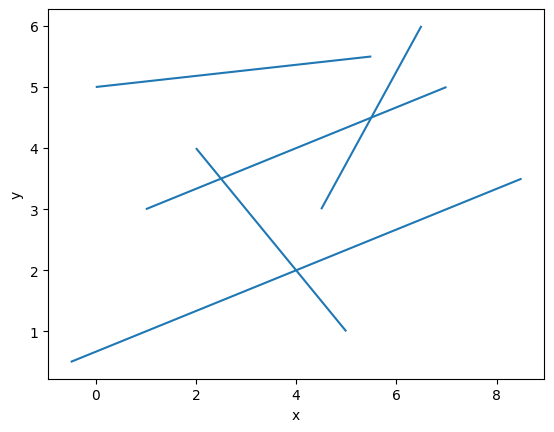

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

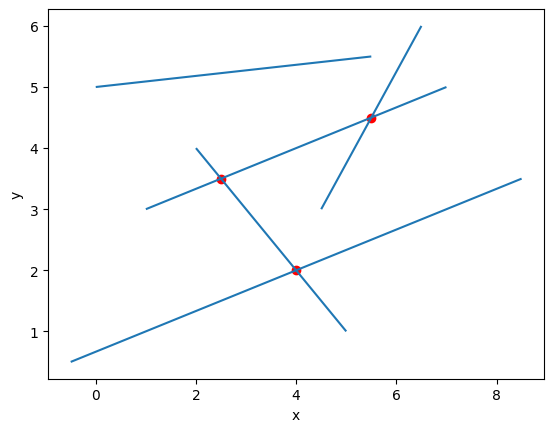

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    sections = []
    xs_set = set()

    while len(sections) < n:
        x1 = np.random.uniform(0, max_x)
        if not x1 in xs_set: # aby wykluczyć powtarzanie końców o tej samej x
            x2 = np.random.uniform(x1, max_x)
            if x1 != x2 and not x2 in xs_set: # to co powyżej oraz wykluczenie odcinków pionowych
                y1, y2 = np.random.uniform(0, max_y), np.random.uniform(0, max_y)
                xs_set.add(x1)
                xs_set.add(x2)
                sections.append(((x1, y1), (x2, y2)))

    return sections

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.169s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

Do przetestowania algorytmu wyszukiwania przecięć wymagany jest taki zbiór odcinków, dla którego w każdym punkcie przecięcia przecinają się maksymalnie dwa odcinki.
Wymagane jest losowanie aż do uzyskania takiego zbioru.

In [7]:
section = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj oraz wypisz otrzymane odcinki

[((895.9624763195229, 118.86315191264573), (977.288830598591, 756.1834667523449)), ((259.5088644971552, 322.75438559968194), (982.2874496332189, 665.2742876720728)), ((292.1887098168895, 259.7687603661102), (887.6744005603466, 26.13245418950627)), ((270.55001739989046, 191.5077404533988), (769.1934920607102, 627.0283962532807)), ((989.2101977829917, 750.6382070130383), (994.4686487943595, 696.315630607359)), ((632.8092864155353, 813.3403003583159), (961.4046110409926, 313.09212717560206)), ((488.137894452768, 684.7408630242078), (751.5176616268824, 939.2070229373235)), ((869.6173423500843, 340.865163610382), (928.7870288061772, 485.75495322931215)), ((208.0155049957757, 253.80435413019953), (782.7052046426473, 962.5542757370652)), ((561.2410991990694, 468.4419147920841), (921.3485544609465, 317.858363028538)), ((753.6220048560427, 93.9986890210871), (809.3342126342476, 983.7277425021932)), ((612.046843723541, 588.4694761884913), (961.6783480165157, 715.0395522512314)), ((0.515309422352

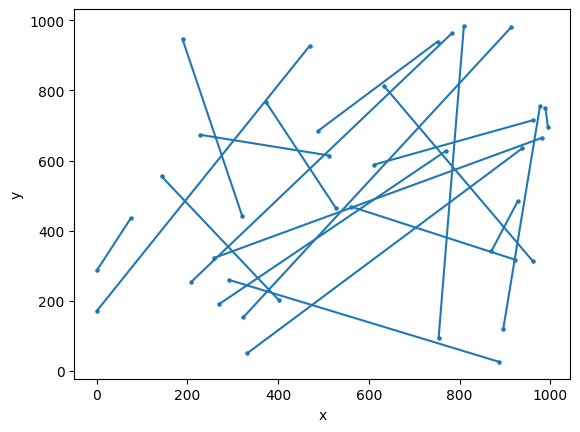

In [8]:
vis = Visualizer()
vis.add_line_segment(section)
vis.add_point([section[i // 2][i % 2] for i in range(2 * len(section))], s = 5)
vis.show()
print(section)

# Zadawanie zbioru odcinków przy użyciu myszki

Poniższa funkcja umożliwia dodawanie odcinków przy użyciu myszki. Aby wstawić punkt, należy wykonać podwójne kliknięcie lewym przyciskiem myszy w wybranym miejscu. Kolejne dwa dodane punkty automatycznie tworzą odcinek. W przypadku próby dodania punktu z już istniejącą wartością x, program wyświetli odpowiedni komunikat. Proces wprowadzania odcinków można zakończyć (po zdefiniowaniu przynajmniej dwóch odcinków) poprzez podwójne kliknięcie prawym przyciskiem myszy.

In [9]:
%matplotlib tk

interactive_sections = []
xs_set = set()
active = True
curr_points = []

def draw_point(point):
    """
    Umieszcza punkt o danych współrzędnych na płaszczyźnie.
    :param point: krotka (x, y) określająca położenie punktu
    """
    plt.scatter(point[0], point[1], color="red")
    plt.show()

def draw_line(points):
    """
    Tworzy linię łączącą dwa punkty na płaszczyźnie.
    :param points: lista krotek reprezentujących punkty, pomiędzy którymi dodajemy krawędź
    """
    ax = plt.gca()
    x = [points[0][0], points[1][0]]
    y = [points[0][1], points[1][1]]
    line = ax.plot(x, y, color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    """
    Obsługuje interakcję z myszą:
    - podwójne kliknięcie lewym przyciskiem dodaje nowy punkt
    - podwójne kliknięcie prawym przyciskiem kończy tworzenie wielokąta
    :param event: obiekt zawierający dane o zdarzeniu myszy
    """
    global active
    global curr_points

    if event.dblclick and active:
        if event.button == 1:
            x = event.xdata
            y = event.ydata
            if x in xs_set:
                ax.set_title("Współrzędne x-owe punktów nie mogą się powtarzać!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                xs_set.add(x)
                curr_points.append((x, y))
                draw_point((x, y))
                if len(curr_points) == 2:
                    draw_line(curr_points)
                    interactive_sections.append((curr_points[0], curr_points[1]))
                    curr_points = []
        elif event.button == 3:
            if len(interactive_sections) < 2:
                ax.set_title("Wymagane co najmniej 2 odcinki!")
                plt.pause(1.5)
                ax.set_title("Podwójne kliknięcie LPM: dodaj punkt\nPodwójne kliknięcie PPM: zakończ\nKażda kolejna para punktów stworzy odcinek")
            else:
                active = False
                plt.pause(0.5)
                ax.set_title("Odcinki zostały utworzone. Zamykanie okna...")
                plt.pause(2)
                plt.close()

fig, ax = plt.subplots()
plt.get_current_fig_manager().set_window_title("Kreator odcinków")
ax.set_title("Podwójne kliknięcie LPM: dodaj punkt\nPodwójne kliknięcie PPM: zakończ\nKażda kolejna para punktów stworzy odcinek")
connection_id = fig.canvas.mpl_connect("button_press_event", onclick)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.aspect = 1
plt.tight_layout()
plt.ion()
plt.show()

Zwizualizujmy oraz wypiszmy zadany przez nas zbiór odcinków

[((0.5035147292843986, 1.5321338344938074), (0.8030373275527207, 0.47846447717049717)), ((1.138646985853371, 1.04966418140366), (0.27977495708396505, 0.6115595538850205)), ((0.6875587354492713, 1.3546737322077762), (1.0953425138145776, 0.5061926181526897)), ((1.3768215820667358, 0.533920759134882), (1.8351272444773012, 0.5172838745455666)), ((1.6546919443156614, 1.0607554377965371), (1.441778290124926, 1.5931357446546306)), ((1.4706479381507886, 0.195637439152135), (1.5608655882316085, 1.7539589623513463)), ((0.4313406092197426, 0.20672869554501194), (0.30142719310336175, 0.9831166430463985)), ((0.16790507098374827, 1.7595045905477849), (0.817472151565652, 1.6264095138332615)), ((1.102559925821043, 1.7428677059584694), (0.9365594496723344, 1.260398052868322))]


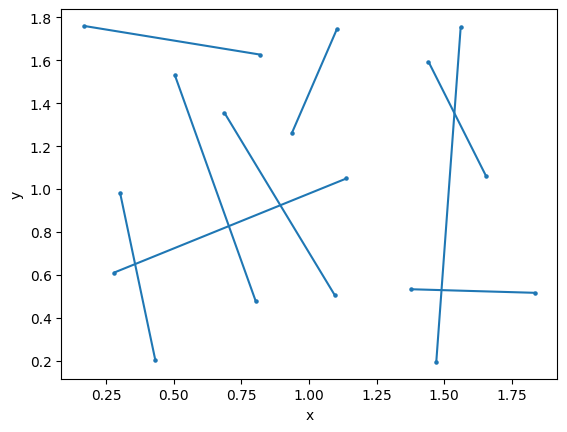

In [10]:
%matplotlib inline
vis = Visualizer()
vis.add_line_segment(interactive_sections)
vis.add_point([interactive_sections[i // 2][i % 2] for i in range(2 * len(interactive_sections))], s = 5)
vis.show()
print(interactive_sections)

# W celu przetestowania poniższych algorytmów wygenerowano następujące zbiory:

In [11]:
A = [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]
B = [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)), ((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)), ((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)), ((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)), ((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)), ((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)), ((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)), ((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)), ((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)), ((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]
C = [((151.71857944551414, 28.63978406782419), (149.9103454604751, 571.8262165187973)), ((651.8199885096267, 739.5237891837903), (742.50556723211, 555.2364158475996)), ((25.30464743706129, 369.8405334880839), (536.878943598469, 288.57844563303206)), ((565.7862935779948, 497.4864029863543), (568.9650642524848, 427.391988815814)), ((676.0766731416098, 213.709415349427), (685.9483574068453, 391.2452058489173)), ((237.24657011589358, 633.255577896029), (411.5072182184598, 277.0236355415344)), ((261.38599817081666, 676.5376540643025), (953.309306056201, 164.6894529954126)), ((606.9538196780782, 535.8766162390781), (187.56461232933574, 11.859686531392576)), ((906.108656731719, 965.0255684814202), (681.6772314085356, 918.881191162927)), ((335.3899840947229, 595.2502258707291), (552.3850802254652, 934.3287248570406)), ((885.1100856051186, 179.5006358465232), (510.2226796664653, 888.1639094545408)), ((309.6882750759917, 8.460982034457665), (269.7213604511839, 457.78922343710235)), ((935.5020062204358, 917.6794987515578), (881.740662772811, 974.6491936067625)), ((972.2819503254556, 64.00569756492558), (796.1292660105884, 728.4710300000248)), ((883.4124466013072, 915.6807486408467), (660.3634767083245, 403.42143724075305))]
D = [((0.34112295913892254, 1.7317764495655925), (1.8315185384740686, 0.5006469899562511)), ((0.2653401330710339, 0.301004374884466), (1.8531707744934651, 1.0441185532072217)), ((0.052426478880298694, 0.9221147328855752), (0.1246005989449547, 1.0219360404214677)), ((0.22564436703547305, 0.9997535276357139), (0.3266881351259914, 0.9221147328855752)), ((0.4132970792035785, 0.9498428738677676), (0.5071234352876313, 1.0163904122250293)), ((0.58290626135552, 1.0163904122250293), (0.6622977934266416, 0.9221147328855752)), ((0.8066460335559535, 0.8943865919033829), (0.8860375656270751, 0.9720253866535216)), ((0.8138634455624192, 1.0108447840285908), (0.889646271630308, 0.7834740279746133)), ((0.979863921711128, 0.8999322200998212), (1.0195596877466888, 1.0441185532072217)), ((1.138646985853371, 0.9609341302606444), (1.1855601638953974, 0.8666584509211905)), ((1.7160399463706189, 1.5321338344938074), (1.5644742942348413, 0.5893770410992667)), ((1.7954314784417404, 1.5487707190831228), (1.607778766273635, 0.38418879783104315)), ((1.7413008883932486, 0.7999322200998212), (1.7995620684902325, 0.8021147328855752))]

letters = ['A', 'B', 'C', 'D']
sections = [A, B, C, D]

Zwizualizujmy zbiory testowe oraz podajmy ich liczbę odcinków.

Zbiór A , liczba odcinków:  4
Zbiór B , liczba odcinków:  10
Zbiór C , liczba odcinków:  15
Zbiór D , liczba odcinków:  13


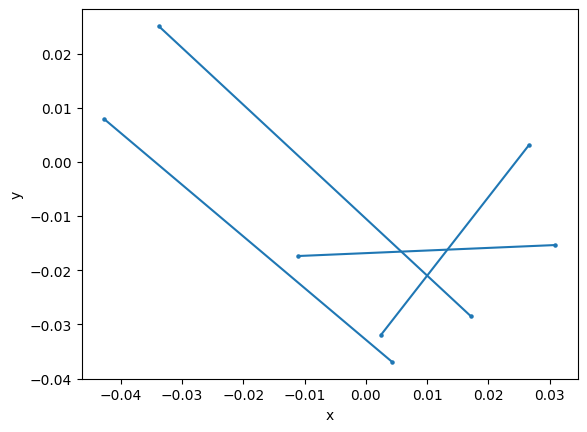

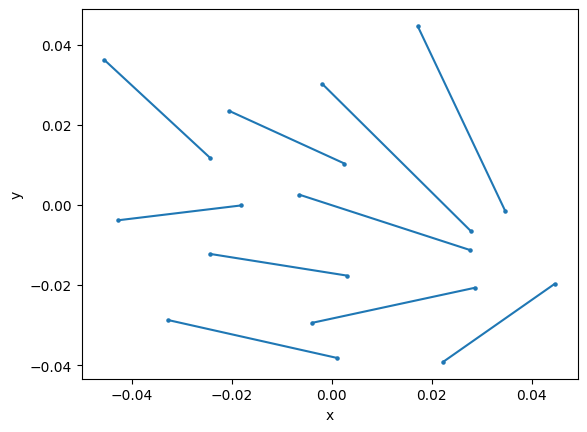

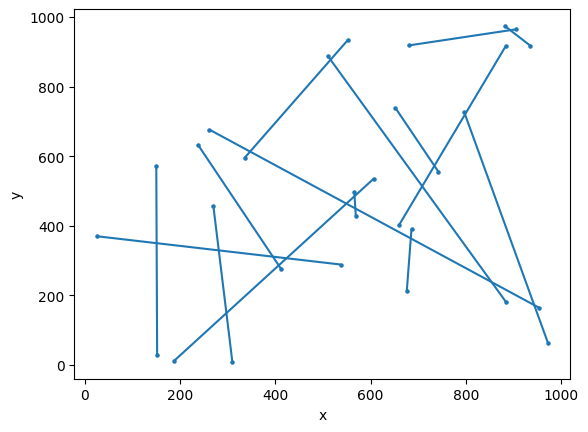

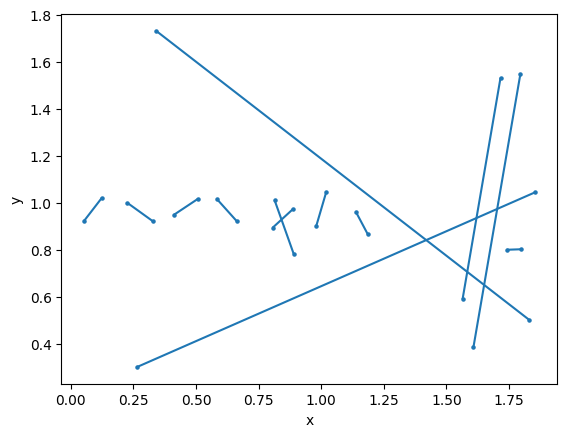

In [12]:
vis = Visualizer()
for i in range(len(sections)):
    print('Zbiór', letters[i], ', liczba odcinków: ', str(len(sections[i])))
    vis.clear()
    vis.add_line_segment(sections[i])
    vis.add_point([sections[i][j // 2][j % 2] for j in range(2 * len(sections[i]))], s = 5)
    vis.show()

Uzupełnij funkcję ```is_intersection```

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

W poniższej funkcji jako struktury zdarze (Q) użyto listy, która została posortowana malejąco (w celu zapewnienia złożoności O(1) operacji .pop()). Taka struktura jest wystarczająca, gdyż w tym przypadku nie będziemy dodawać do niej punktów przecięcia. Jako struktury stanu (T) użyto SortedSet z biblioteki sortedcontainers.

In [13]:
eps = 1e-12

In [14]:
class PType(Enum):
    LEFT = 0
    RIGHT = 1
    INTERSECT = 2


class Point:
    def __init__(self, x, y, type : PType, section_idx, second_section_idx = None):
        self.x = x
        self.y = y
        self.type = type
        self.origin_section_idx = section_idx
        self.second_section_idx = second_section_idx

    def __lt__(self, other):
        return self.x - other.x < -eps
    
    def __eq__(self, other):
        if not isinstance(other, Point): return False
        return abs(self.x - other.x) < eps and abs(self.y - other.y) < eps
    
    def __str__(self):
        return f"({self.x}, {self.y}), type: {self.type}, origin section index: {self.origin_section_idx}"
    
    def __repr__(self):
        return f"({self.x}, {self.y}), type: {self.type}"
    
    def __hash__(self):
        return hash((self.x, self.y))

# na ich podstawie powstanie struktura stanu
# wartość do porównywania odległości w y będzie wyliczana na podstawie x aktualizowanego dla całej klasy (podczas ruchu miotły)
class Section:
    x = None
    
    def __init__(self, left: Point, right: Point, idx):
        self.left = left
        self.right = right
        self.a = (right.y - left.y) / (right.x - left.x)
        self.b = left.y - (self.a * left.x)
        self.idx = idx

    def update(x):
        Section.x = x

    def __eq__(self, other):
        if not isinstance(other, Section): return False
        return self.idx == other.idx
    
    def __lt__(self, other):
        y1 = self.a * Section.x + self.b
        y2 = other.a * Section.x + other.b
        if abs(y1 - y2) > eps:
            return y1 < y2
        if abs(self.a - other.a) > eps:
            return self.a < other.a
        return self.idx < other.idx
    
    def __str__(self):
        return f"Odcinek między: {self.left} a {self.right}"

    def __repr__(self):
        return f"Section({self.left}, {self.right}, idx={self.idx})"
    
    def __hash__(self):
        return self.idx # indeks jest indywidualny dla każdego odcinka i niezmienny

In [15]:
def check_intersections(section1 : Section, section2 : Section):
    if abs(section1.a - section2.a) < eps: return None # odcinki równoległe

    x = (section2.b - section1.b) / (section1.a - section2.a)

    max_lower = section1.left if section1.left > section2.left else section2.left
    min_upper = section1.right if section1.right < section2.right else section2.right

    if max_lower.x <= x <= min_upper.x:
        y = section1.a * x + section1.b
        return (x, y)
    
    return None

In [16]:
def process_neighbor_bool(idx1, idx2, T : SortedSet, checked_pairs : set, sections_classes : list):
    if T[idx1].idx < T[idx2].idx:
        i, j = T[idx1].idx, T[idx2].idx
    else:
        i, j = T[idx2].idx, T[idx1].idx
    if not (i, j) in checked_pairs:
        checked_pairs.add((i, j))
        if check_intersections(sections_classes[i], sections_classes[j]):
            return True
        
    return False

In [17]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    W tej funkcji nie trzeba dodawać ani rozpatrywać punktów przecięcia, bo jeżeli jakikolwiek znajdziemy to zwracamy boola.
    :param sections: tablica odcinków w postaci krotek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    Q = [] # struktura zdarzeń (punkty) -> użyto zwykłej listy, gdyż w tym przypadku do Q później nie dodajemy punktów
    T = SortedSet() # struktura stanu (odcinki)
    checked_pairs = set() # do przechowywania informacji o sprawdzeniu przecięć między parami odcinków
    sections_classes = []

    for i in range(len(sections)):
        p1, p2 = sections[i]
        if p1 < p2:
            left, right = p1, p2
        else:
            left, right = p2, p1
        
        left_c = Point(*left, PType.LEFT, i)
        right_c = Point(*right, PType.RIGHT, i)

        Q.append(left_c)
        Q.append(right_c)
    
        sections_classes.append(Section(left_c, right_c, i))

    Q.sort(reverse = True) # posortowana malejąco od x dla zapewnienia .pop() w O(1)

    while len(Q) > 0:
        e : Point
        e = Q.pop() # zdarzenie o najmniejszym x
        Section.update(e.x)
        curr = sections_classes[e.origin_section_idx]

        if e.type == PType.LEFT:
            T.add(curr)
            curr_idx = T.index(curr)
            if curr_idx - 1 > -1 and process_neighbor_bool(curr_idx - 1, curr_idx, T, checked_pairs, sections_classes):
                return True
            if curr_idx + 1 < len(T) and process_neighbor_bool(curr_idx + 1, curr_idx, T, checked_pairs, sections_classes):
                return True
        else:
            curr_idx = T.index(curr)
            if curr_idx - 1 > -1 and curr_idx + 1 < len(T) and process_neighbor_bool(curr_idx - 1, curr_idx + 1, T, checked_pairs, sections_classes):
                return True
            T.discard(curr)

    return False

In [18]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.001s


Przetestujmy teraz czy zadane przez nas zbiory mają punkty przecięcia.

In [19]:
for i in range(len(sections)):
    print(letters[i], ":", is_intersection(sections[i]))

A : True
B : False
C : True
D : True


Uzupełnij funkcję ```is_intersection_with_visualization```

In [20]:
def process_neighbor_bool_vis(idx1, idx2, T : SortedSet, checked_pairs : set, sections_classes : list, vis : Visualizer, sections : list):
    if T[idx1].idx < T[idx2].idx:
        i, j = T[idx1].idx, T[idx2].idx
    else:
        i, j = T[idx2].idx, T[idx1].idx
    if not (i, j) in checked_pairs:
        checked_pairs.add((i, j))
        point_one = vis.add_point(sections[i][0], color = "yellow", s = 25)
        point_two = vis.add_point(sections[i][1], color = "yellow", s = 25)
        section_one = vis.add_line_segment(sections[i], color = "yellow")
        point_three = vis.add_point(sections[j][0], color = "yellow", s = 25)
        point_four = vis.add_point(sections[j][1], color = "yellow", s = 25)
        section_two = vis.add_line_segment(sections[j], color = "yellow")
        if (p:= check_intersections(sections_classes[i], sections_classes[j])):
            vis.add_point(p, color = "red", s = 35)
            return True
        vis.remove_figure(point_one)
        vis.remove_figure(point_two)
        vis.remove_figure(section_one)
        vis.remove_figure(point_three)
        vis.remove_figure(point_four)
        vis.remove_figure(section_two)
        
    return False

In [21]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    Q = [] # struktura zdarzeń (punkty) -> użyto zwykłej listy, gdyż w tym przypadku do Q później nie dodajemy punktów
    T = SortedSet() # struktura stanu (odcinki)
    checked_pairs = set() # do przechowywania informacji o sprawdzeniu przecięć między parami odcinków
    sections_classes = []

    n = len(sections)
    vis = Visualizer()
    if n == 0: return False, vis
    vis.add_line_segment(sections)
    vis.add_point([sections[i // 2][i % 2] for i in range(2 * n)], color = "blue")

    for i in range(len(sections)):
        p1, p2 = sections[i]
        if p1 < p2:
            left, right = p1, p2
        else:
            left, right = p2, p1
        
        left_c = Point(*left, PType.LEFT, i)
        right_c = Point(*right, PType.RIGHT, i)

        Q.append(left_c)
        Q.append(right_c)
    
        sections_classes.append(Section(left_c, right_c, i))

    Q.sort(reverse = True) # posortowana malejąco od x dla zapewnienia .pop() w O(1)

    while len(Q) > 0:
        e : Point
        e = Q.pop() # zdarzenie o najmniejszym x
        Section.update(e.x)
        curr : Section
        curr = sections_classes[e.origin_section_idx]
        broom = vis.add_line(((e.x, curr.left.y), (e.x, curr.right.y)), color = "red")

        if e.type == PType.LEFT:
            T.add(curr) 
            vis.add_point((e.x, e.y), color = "green",s = 25)
            vis.add_line_segment(sections[e.origin_section_idx], color = "green")
            rig = sections[e.origin_section_idx][1] if sections[e.origin_section_idx][1] != (e.x, e.y) else sections[e.origin_section_idx][0]
            vis.add_point(rig, color = "green", s = 25) # punkt prawy
            curr_idx = T.index(curr)
            if curr_idx - 1 > -1 and process_neighbor_bool_vis(curr_idx - 1, curr_idx, T, checked_pairs, sections_classes, vis, sections):
                return True, vis
            if curr_idx + 1 < len(T) and process_neighbor_bool_vis(curr_idx + 1, curr_idx, T, checked_pairs, sections_classes, vis, sections):
                return True, vis
        else:
            curr_idx = T.index(curr)
            vis.add_point((e.x, e.y), color = "brown", s = 25)
            vis.add_line_segment(sections[e.origin_section_idx], color = "brown")
            lef = sections[e.origin_section_idx][0] if sections[e.origin_section_idx][0] != (e.x, e.y) else sections[e.origin_section_idx][1]
            vis.add_point(lef, color = "brown", s = 25) # punkt lewy
            if curr_idx - 1 > -1 and curr_idx + 1 < len(T) and process_neighbor_bool_vis(curr_idx - 1, curr_idx + 1, T, checked_pairs, sections_classes, vis, sections):
                return True, vis
            T.discard(curr)
        vis.remove_figure(broom)

    return False, vis

Zwizualizujmy teraz poszczególne kroki powyższego algorytmu sprawdzania obecności przecięcia. Kolorem niebieskim zostały oznaczone odcinki oraz ich punkty. Na zielono oznaczne są odcinki dodawane do struktury stanu, a na brązowo te, które zostały już z niej usunięte. Kolorem żółtym oznaczono odcinki, które w danym momencie weryfikowane są w celu wyznaczenia punktu przecięcia (analiza "sąsiadów").

Zbiór A


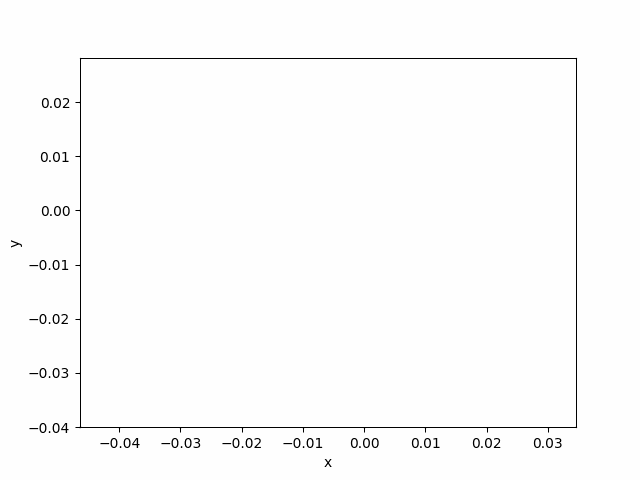

In [22]:
vis.clear()
bool_value,vis=is_intersection_with_visualization(sections[0])
print("Zbiór A")
vis.show_gif(interval=200)

Zbiór B


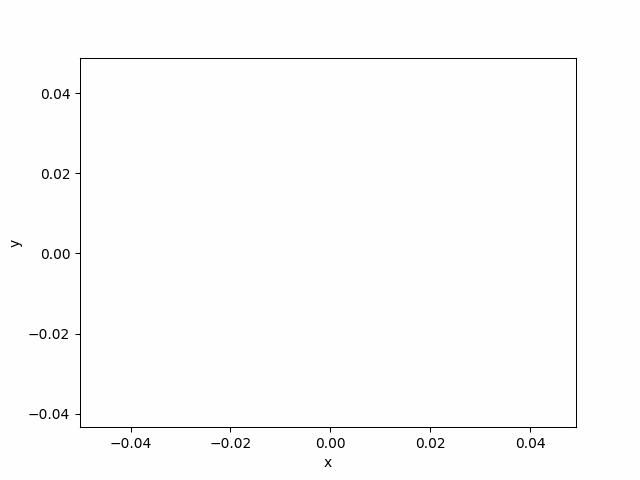

In [23]:
vis.clear()
bool_value,vis=is_intersection_with_visualization(sections[1])
print("Zbiór B")
vis.show_gif(interval=200)

Zbiór C


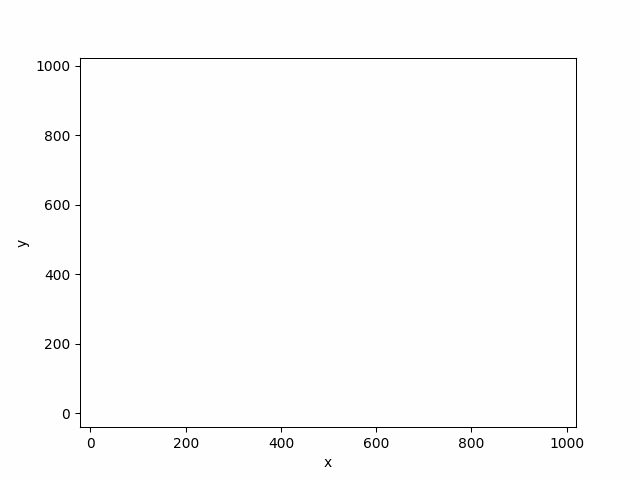

In [24]:
vis.clear()
bool_value,vis=is_intersection_with_visualization(sections[2])
print("Zbiór C")
vis.show_gif(interval=200)

Zbiór D


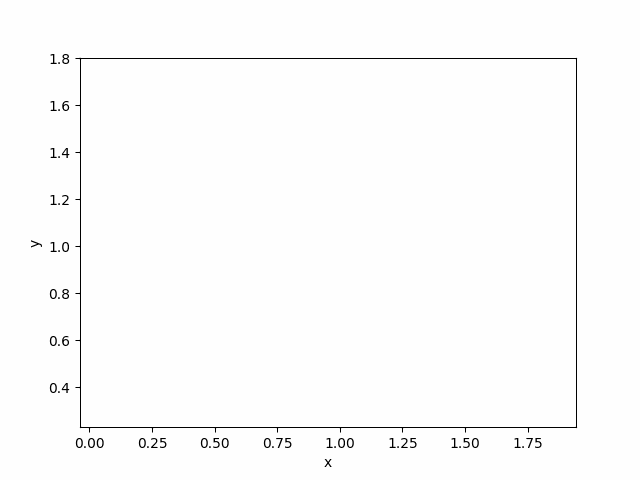

In [25]:
vis.clear()
bool_value,vis=is_intersection_with_visualization(sections[3])
print("Zbiór D")
vis.show_gif(interval=200)

Uzupełnij funkcję ```find_intersections```

In [26]:
def process_neighbor(idx1, idx2, T, checked_pairs : set, sections_classes : list, points : list, Q : list):
    if T[idx1].idx < T[idx2].idx:
        i, j = T[idx1].idx, T[idx2].idx
    else:
        i, j = T[idx2].idx, T[idx1].idx
    if not (i, j) in checked_pairs:
        checked_pairs.add((i, j))
        if (p := check_intersections(sections_classes[i], sections_classes[j])):
            points.append((p, i + 1, j + 1)) # bo tak w bicie zrobili testy...
            heappush(Q, Point(*p, PType.INTERSECT, i, j))

In [27]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    Q = [] # struktura zdarzeń (punkty)
    T = SortedSet() # struktura stanu (odcinki)
    checked_pairs = set() # do przechowywania informacji o sprawdzeniu przecięć między parami odcinków
    sections_classes = []
    points = []

    for i in range(len(sections)):
        p1, p2 = sections[i]
        if p1 < p2:
            left, right = p1, p2
        else:
            left, right = p2, p1
        
        left_c = Point(*left, PType.LEFT, i)
        right_c = Point(*right, PType.RIGHT, i)

        Q.append(left_c)
        Q.append(right_c)
    
        sections_classes.append(Section(left_c, right_c, i))

    heapify(Q)

    while len(Q) > 0:
        e : Point
        e = heappop(Q) # zdarzenie o najmniejszym x
        curr = sections_classes[e.origin_section_idx]

        if e.type == PType.LEFT:
            Section.update(e.x)
            T.add(curr)
            curr_idx = T.index(curr)
            if curr_idx - 1 > -1:
                process_neighbor(curr_idx - 1, curr_idx, T, checked_pairs, sections_classes, points, Q)
            if curr_idx + 1 < len(T):
                process_neighbor(curr_idx + 1, curr_idx, T, checked_pairs, sections_classes, points, Q)
        elif e.type == PType.RIGHT:
            Section.update(e.x)
            curr_idx = T.index(curr)
            if curr_idx - 1 > -1 and curr_idx + 1 < len(T):
                process_neighbor(curr_idx - 1, curr_idx + 1, T, checked_pairs, sections_classes, points, Q)
            T.discard(curr)
        else:
            T.remove(sections_classes[e.origin_section_idx])
            T.remove(sections_classes[e.second_section_idx])
            Section.update(e.x + eps) # niezbędne bo __lt__ nie działa poprawnie w punkcie przecięcia
            T.add(sections_classes[e.origin_section_idx])
            T.add(sections_classes[e.second_section_idx])
            i, j = T.index(sections_classes[e.origin_section_idx]), T.index(sections_classes[e.second_section_idx])
            if i < j: # pozwala na wykonanie po jednym sprawdzeniu przecięcia dla zamienionych odcinków
                k, l = i, j
            else:
                k, l = j, i
            if k - 1 > -1:
                process_neighbor(k - 1, k, T, checked_pairs, sections_classes, points, Q)
            if l + 1 < len(T):
                process_neighbor(l + 1, l, T, checked_pairs, sections_classes, points, Q)
                    
    return points
    

In [28]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.003s


In [29]:
def generate_result(points):
    print('Liczba przecięć: ', str(len(points)))
    res = []

    for p, i, j in points:
        res.append((p, i - 1, j - 1))

    return res

Zwizualizujmy teraz odcinki wraz z punktami przecięcia i wypiszmy zbiory wynikowe.
Na poniższych wizualizacjach odcinki zostały oznaczone kolorem niebieskim, a punkty przecięcia czerwonymi punktami.

Zbiór A
Liczba przecięć:  3
[((0.005806934807635715, -0.016556444720678153), 1, 2), ((0.013332591183346312, -0.01619339562692305), 2, 3), ((0.010025601838031018, -0.020988202988542273), 1, 3)]
Zbiór B
Liczba przecięć:  0
[]
Zbiór C
Liczba przecięć:  18
[((150.64902440575895, 349.92994405895297), 0, 2), ((423.45240319415933, 306.5959214143435), 2, 7), ((394.8159419534431, 311.14473992743524), 2, 5), ((281.15924253558273, 329.1987757981024), 2, 11), ((297.2011174273915, 148.84791555272412), 7, 11), ((346.9186963940761, 613.2650959365228), 6, 9), ((407.0602585242389, 286.1143230070835), 5, 7), ((549.1565286507627, 463.66026336481235), 6, 7), ((515.9333211373835, 877.368876559131), 9, 10), ((854.1355344386819, 238.05295443718308), 6, 10), ((566.3462716647992, 485.13844210390016), 3, 7), ((567.9508029400314, 449.75725507512834), 3, 6), ((708.3519752790136, 513.6329089401747), 10, 14), ((684.4114985286526, 363.60580324089824), 4, 6), ((733.9963788151691, 572.5284263819274), 1, 14), ((798.312

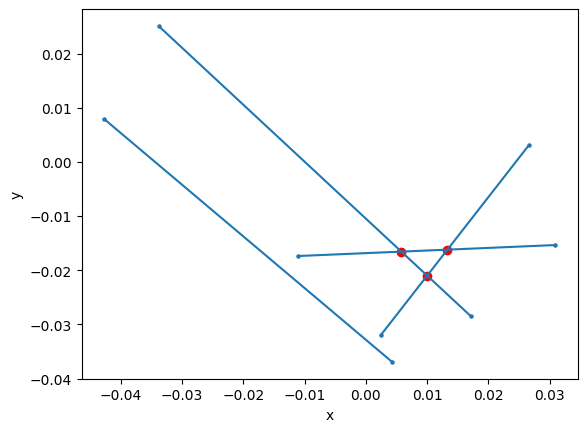

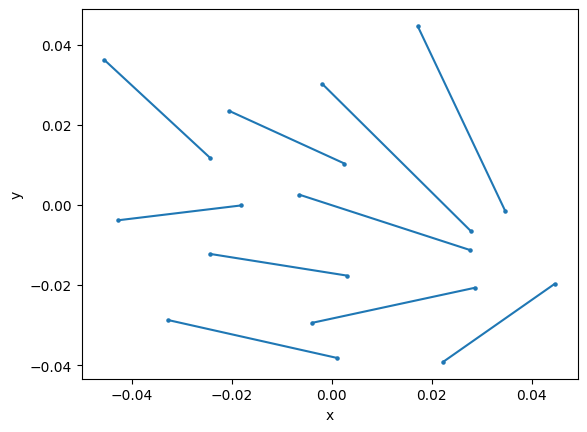

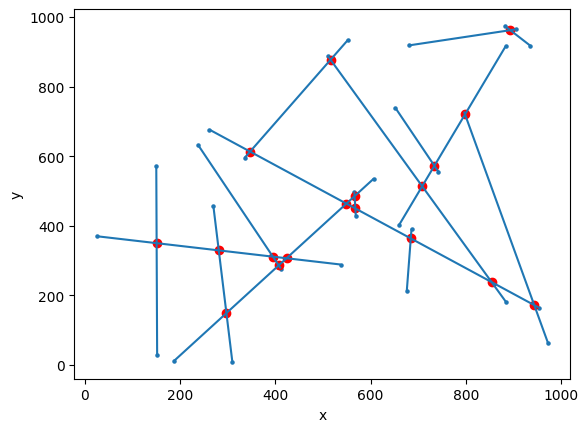

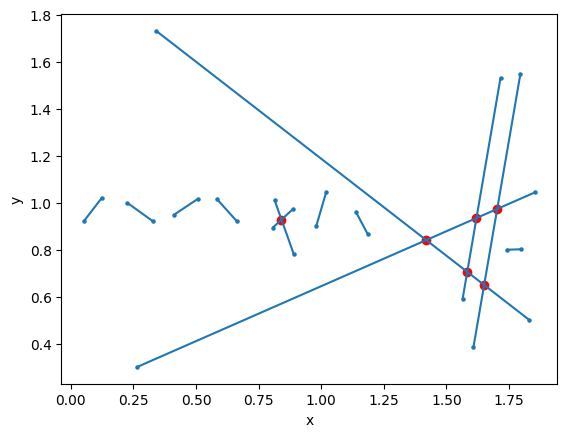

In [30]:
for i in range(len(sections)):
    print("Zbiór", letters[i])
    res = generate_result(find_intersections(sections[i]))
    print(res)
    vis.clear()
    vis.add_line_segment(sections[i])
    vis.add_point([sections[i][j // 2][j % 2] for j in range(2 * len(sections[i]))], s = 5)
    for p, _, _ in res:
        vis.add_point(p, c = "red")
    vis.show()

Uzupełnij funkcję ```find_intersections_with_visualization```

In [31]:
def process_neighbor_vis(idx1, idx2, T, checked_pairs : set, sections_classes : list, points : list, Q : list, vis : Visualizer, sections : list):
    if T[idx1].idx < T[idx2].idx:
        i, j = T[idx1].idx, T[idx2].idx
    else:
        i, j = T[idx2].idx, T[idx1].idx
    if not (i, j) in checked_pairs:
        checked_pairs.add((i, j))
        point_one = vis.add_point(sections[i][0], color = "yellow", s = 25)
        point_two = vis.add_point(sections[i][1], color = "yellow", s = 25)
        section_one = vis.add_line_segment(sections[i], color = "yellow")
        point_three = vis.add_point(sections[j][0], color = "yellow", s = 25)
        point_four = vis.add_point(sections[j][1], color = "yellow", s = 25)
        section_two = vis.add_line_segment(sections[j], color = "yellow")
        if (p := check_intersections(sections_classes[i], sections_classes[j])):
            points.append((p, i + 1, j + 1)) # bo tak w bicie zrobili testy...
            heappush(Q, Point(*p, PType.INTERSECT, i, j))
            vis.add_point(p, color = "red", s = 35)
        vis.remove_figure(point_one)
        vis.remove_figure(point_two)
        vis.remove_figure(section_one)
        vis.remove_figure(point_three)
        vis.remove_figure(point_four)
        vis.remove_figure(section_two)

In [32]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    Q = [] # struktura zdarzeń (punkty)
    T = SortedSet() # struktura stanu (odcinki)
    checked_pairs = set() # do przechowywania informacji o sprawdzeniu przecięć między parami odcinków
    sections_classes = []
    points = []

    n = len(sections)
    vis = Visualizer()
    if n == 0: return points, vis
    vis.add_line_segment(sections)
    vis.add_point([sections[i // 2][i % 2] for i in range(2 * n)], color = "blue")

    for i in range(len(sections)):
        p1, p2 = sections[i]
        if p1 < p2:
            left, right = p1, p2
        else:
            left, right = p2, p1
        
        left_c = Point(*left, PType.LEFT, i)
        right_c = Point(*right, PType.RIGHT, i)

        Q.append(left_c)
        Q.append(right_c)
    
        sections_classes.append(Section(left_c, right_c, i))

    heapify(Q)

    while len(Q) > 0:
        e : Point
        e = heappop(Q) # zdarzenie o najmniejszym x
        curr : Section
        curr = sections_classes[e.origin_section_idx]
        broom = vis.add_line(((e.x, curr.left.y), (e.x, curr.right.y)), color = "red")
        
        if e.type == PType.LEFT:
            Section.update(e.x)
            T.add(curr)
            vis.add_point((e.x, e.y), color = "green",s = 25)
            vis.add_line_segment(sections[e.origin_section_idx], color = "green")
            rig = sections[e.origin_section_idx][1] if sections[e.origin_section_idx][1] != (e.x, e.y) else sections[e.origin_section_idx][0]
            vis.add_point(rig, color = "green", s = 25) # punkt prawy
            curr_idx = T.index(curr)
            if curr_idx - 1 > -1:
                process_neighbor_vis(curr_idx - 1, curr_idx, T, checked_pairs, sections_classes, points, Q, vis, sections)
            if curr_idx + 1 < len(T):
                process_neighbor_vis(curr_idx + 1, curr_idx, T, checked_pairs, sections_classes, points, Q, vis, sections)
        elif e.type == PType.RIGHT:
            Section.update(e.x)
            curr_idx = T.index(curr)
            vis.add_point((e.x, e.y), color = "brown", s = 25)
            vis.add_line_segment(sections[e.origin_section_idx], color = "brown")
            lef = sections[e.origin_section_idx][0] if sections[e.origin_section_idx][0] != (e.x, e.y) else sections[e.origin_section_idx][1]
            vis.add_point(lef, color = "brown", s = 25) # punkt lewy
            if curr_idx - 1 > -1 and curr_idx + 1 < len(T):
                process_neighbor_vis(curr_idx - 1, curr_idx + 1, T, checked_pairs, sections_classes, points, Q, vis, sections)
            T.discard(curr)
        else:
            T.remove(sections_classes[e.origin_section_idx])
            T.remove(sections_classes[e.second_section_idx])
            Section.update(e.x + eps) # niezbędne bo __lt__ nie działa poprawnie w punkcie przecięcia
            T.add(sections_classes[e.origin_section_idx])
            T.add(sections_classes[e.second_section_idx])
            i, j = T.index(sections_classes[e.origin_section_idx]), T.index(sections_classes[e.second_section_idx])
            if i < j: # pozwala na wykonanie po jednym sprawdzeniu przecięcia dla zamienionych odcinków
                k, l = i, j
            else:
                k, l = j, i
            if k - 1 > -1:
                process_neighbor_vis(k - 1, k, T, checked_pairs, sections_classes, points, Q, vis, sections)
            if l + 1 < len(T):
                process_neighbor_vis(l + 1, l, T, checked_pairs, sections_classes, points, Q, vis, sections)
        vis.remove_figure(broom)

    return points, vis

Zwizualizujmy poszczególne kroki naszego algorytmu dla zadanych przez nas zbiorów

Zbiór A


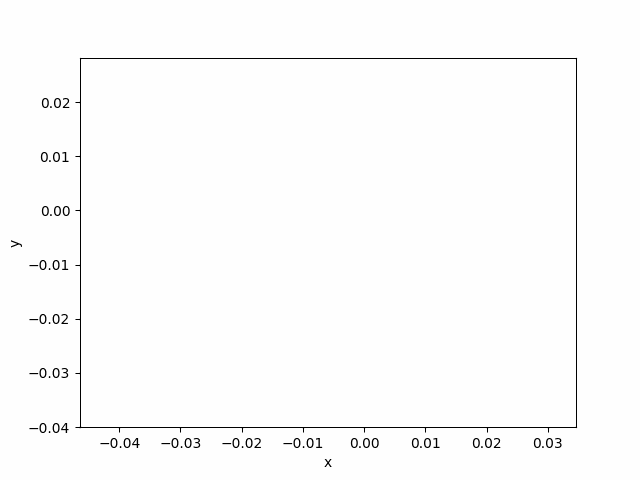

In [33]:
vis.clear()
print("Zbiór A")
intersections,vis=find_intersections_with_visualization(sections[0])
vis.show_gif(interval=200)

Zbiór B


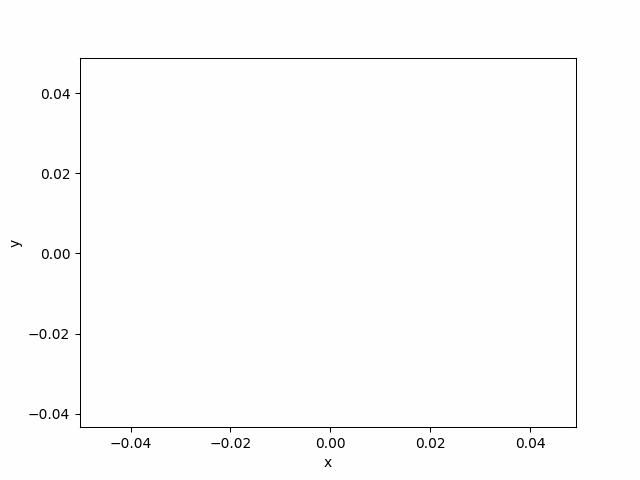

In [34]:
vis.clear()
print("Zbiór B")
intersections,vis=find_intersections_with_visualization(sections[1])
vis.show_gif(interval=200)

Zbiór C


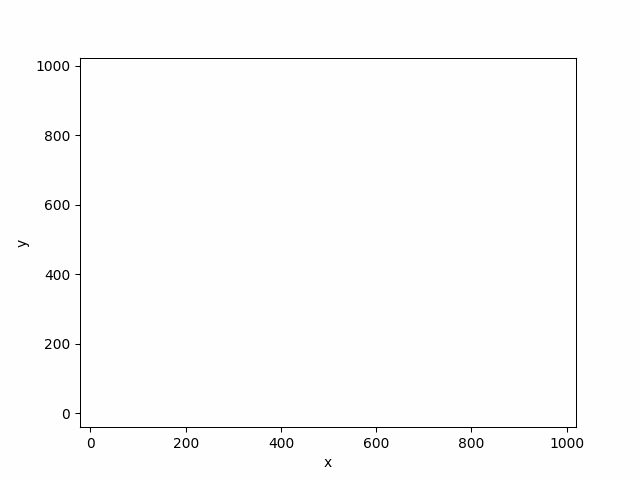

In [35]:
vis.clear()
print("Zbiór C")
intersections,vis=find_intersections_with_visualization(sections[2])
vis.show_gif(interval=200)

Zbiór D


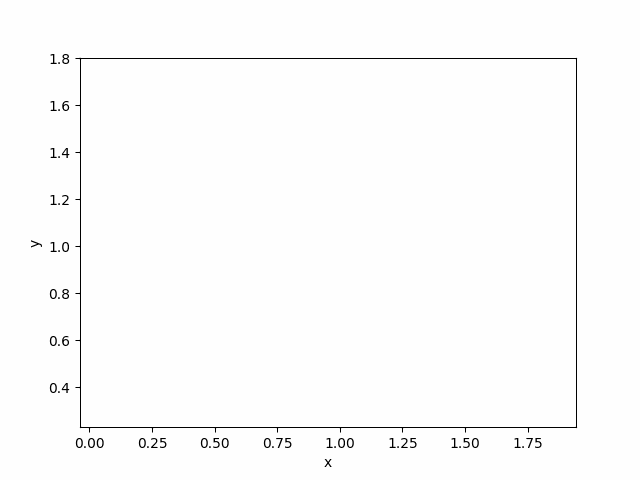

In [36]:
vis.clear()
print("Zbiór D")
intersections,vis=find_intersections_with_visualization(sections[3])
vis.show_gif(interval=200)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

W tym przypadku konieczna była zmiana struktury zdarzeń, ze względu na to, że dodajemy do niej punkty przecięcia. Wybrano do tego kopiec, który zapewnia dodawanie oraz zdejmowanie w złożoności O(logn).

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu (T). Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.

Struktura stanu zostanie zamieniona z SortedSet na zwykłą listę, wraz z wyszukiwaniem binarnym do przyspieszenia operacji wyszukiwania indeksu. Usuwanie i wstawianie wciąż pozostanie liniowe.

In [37]:
def binary_find_place(T, ins):
    n = len(T)
    p, r = 0, n

    while p < r:
        q = (p + r) // 2

        if T[q] < ins:
            p = q + 1
        else:
            r = q
    
    return p

def binary_search(T, val):
    n = len(T)
    p, r = 0, n - 1

    while p <= r:
        q = (p + r) // 2

        if T[q] < val:
            p = q + 1
        elif T[q] > val:
            r = q - 1
        else:
            return q

In [38]:
def find_intersections_list(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    Q = [] # struktura zdarzeń (punkty)
    T = [] # struktura stanu (odcinki)
    checked_pairs = set() # do przechowywania informacji o sprawdzeniu przecięć między parami odcinków
    sections_classes = []
    points = []

    for i in range(len(sections)):
        p1, p2 = sections[i]
        if p1 < p2:
            left, right = p1, p2
        else:
            left, right = p2, p1
        
        left_c = Point(*left, PType.LEFT, i)
        right_c = Point(*right, PType.RIGHT, i)

        Q.append(left_c)
        Q.append(right_c)
    
        sections_classes.append(Section(left_c, right_c, i))

    heapify(Q)

    while len(Q) > 0:
        e : Point
        e = heappop(Q) # zdarzenie o najmniejszym x
        curr = sections_classes[e.origin_section_idx]

        if e.type == PType.LEFT:
            Section.update(e.x)
            T.insert(binary_find_place(T, curr), curr)
            curr_idx = binary_search(T, curr)
            if curr_idx - 1 > -1:
                process_neighbor(curr_idx - 1, curr_idx, T, checked_pairs, sections_classes, points, Q)
            if curr_idx + 1 < len(T):
                process_neighbor(curr_idx + 1, curr_idx, T, checked_pairs, sections_classes, points, Q)
        elif e.type == PType.RIGHT:
            Section.update(e.x)
            curr_idx = binary_search(T, curr)
            if curr_idx - 1 > -1 and curr_idx + 1 < len(T):
                process_neighbor(curr_idx - 1, curr_idx + 1, T, checked_pairs, sections_classes, points, Q)
            j = binary_search(T, curr)
            del T[j]
        else:
            i, j = binary_search(T, sections_classes[e.origin_section_idx]), binary_search(T, sections_classes[e.second_section_idx])
            T[i], T[j] = T[j], T[i]
            Section.update(e.x + eps) # niezbędne bo __lt__ nie działa poprawnie w punkcie przecięcia
            if i < j: # pozwala na wykonanie po jednym sprawdzeniu przecięcia dla zamienionych odcinków
                k, l = i, j
            else:
                k, l = j, i
            if k - 1 > -1:
                process_neighbor(k - 1, k, T, checked_pairs, sections_classes, points, Q)
            if l + 1 < len(T):
                process_neighbor(l + 1, l, T, checked_pairs, sections_classes, points, Q)

    return points

In [39]:
Test().runtest(3, find_intersections_list)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.001s


Wygenerujmy zbiory losowych punktów w celu porównania wydajności. Wymagane będzie początkowe zweryfikowanie czy nie przecinają się więcej niż 3 odcinki w danym punkcie.

In [50]:
no_points = [50, 100, 200, 300, 500, 700, 1000, 1200, 1500, 2000, 2500, 3000]

test_sections = [generate_uniform_sections(1000, 1000, i) for i in no_points]

Wyniki testów zapisywane będą jako CSV, a w nim
Liczba odcinków; Liczba punktów przecięcia; Czas dla SortedSet; Czas dla listy

In [51]:
from time import time

In [52]:
results_df = pd.DataFrame(columns=['SectionsNo', 'Intersections', 'SortedSetTime', 'ListTime'])

for i in range(len(no_points)):
    t0 = time()
    sorted_set_inter = find_intersections(test_sections[i])
    sorted_set_time = time() - t0
    t0 = time()
    list_inter = find_intersections_list(test_sections[i])
    list_time = time() - t0

    if len(sorted_set_inter) != len(list_inter):
        raise Exception("Niezgodna liczba punktów przecięcia między algorytmami")

    results_df.loc[i] = {
        'SectionsNo': no_points[i],
        'Intersections': len(sorted_set_inter),
        'SortedSetTime': sorted_set_time,
        'ListTime': list_time,
    }

results_df.to_csv('speedtest.csv', index = False)

In [53]:
print(results_df)

    SectionsNo  Intersections  SortedSetTime   ListTime
0           50            172       0.017028   0.015312
1          100            735       0.028836   0.012536
2          200           3800       0.148315   0.061489
3          300           6758       0.280227   0.125847
4          500          22691       1.041513   0.465081
5          700          42883       1.996660   0.945384
6         1000          81947       3.915110   1.819808
7         1200         120283       5.932804   2.573090
8         1500         189242       9.218661   4.182147
9         2000         324847      15.931234   7.238718
10        2500         522762      26.177448  12.483763
11        3000         728518      37.335202  17.985526
